In [1]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns


# Download Dataset or run in a kaggle notebook
# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
df = pl.read_csv("C:/Users/LENOVO/Downloads/2019-Oct.csv")

How to update columns and intro to window functions

In [2]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [3]:
df.shape

(42448764, 9)

1. Update values on one or multiple columns

In [4]:
df_top = df.head()
df_top

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [5]:
# Update a string column
df_top.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2")
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2
str,str,i64,i64,str,str,f64,i64,str,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…","""brand-shiseido…"
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…","""brand-aqua"""
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",null
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…","""brand-lenovo"""
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…","""brand-apple"""


In [6]:
# Update a numeric column
df_top.with_columns([
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…","""brand-shiseido…",3579.0
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…","""brand-aqua""",3320.0
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",null,54310.0
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…","""brand-lenovo""",25174.0
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…","""brand-apple""",108198.0


In [7]:
# Create a column with a constant (based on the mean) 
df_top.select([
    pl.all(),
    pl.col("price").mean().alias("price_avg")    
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…",389.162
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…",389.162
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",389.162
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…",389.162
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…",389.162


2. Update values based on window function
In pandas this is done with transform. In R's dplyr with mutate.
The idea is we update values of a column BY a group and the new column has the same size of the original dataframe.
The over() call defines the group we are interested in

In [8]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [9]:
df.with_columns([
    pl.col("price").mean().over("category_code").alias("price_by_categorycode")
]).head(10)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_categorycode
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…",184.912453
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…",109.006036
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",619.629202
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…",711.357948
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…",471.947082
"""2019-10-01 00:…","""view""",1480613,2053013561092866779,"""computers.desk…","""pulser""",908.62,512742880,"""0d0d91c2-c9c2-…",535.683844
"""2019-10-01 00:…","""view""",17300353,2053013553853497655,null,"""creed""",380.96,555447699,"""4fe811e9-91de-…",184.912453
"""2019-10-01 00:…","""view""",31500053,2053013558031024687,null,"""luminarc""",41.16,550978835,"""6280d577-25c8-…",184.912453
"""2019-10-01 00:…","""view""",28719074,2053013565480109009,"""apparel.shoes.…","""baden""",102.71,520571932,"""ac1cd4e5-a3ce-…",78.35775


In [10]:
# now I can compute the difference between the price and the category average.
df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    pl.col("price").mean().over("category_code").alias("price_by_category"),
    (pl.col("price") / pl.col("price").mean().over("category_code") - 1).alias("price_div_cat_average")
])
df_cat_window.head()

category_code,price,price_by_category,price_div_cat_average
str,f64,f64,f64
null,35.79,184.912453,-0.806449
"""appliances.env…",33.2,109.006036,-0.69543
"""furniture.livi…",543.1,619.629202,-0.123508
"""computers.note…",251.74,711.357948,-0.646113
"""electronics.sm…",1081.98,471.947082,1.292588


In [11]:
df_cat_window_sample = df_cat_window.sample(1000000).to_pandas()

<Axes: >

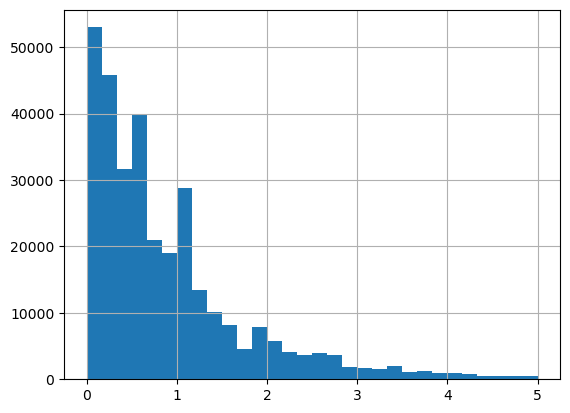

In [12]:
df_cat_window_sample.price_div_cat_average.hist(bins=30, range=[0, 5])

In [13]:
df_cat_window_sample.dtypes

category_code             object
price                    float64
price_by_category        float64
price_div_cat_average    float64
dtype: object

In [14]:
df_cat_window_sample.head()

,category_code,price,price_by_category,price_div_cat_average
0,None,514.50,184.912453,1.782398
1,electronics.clocks,118.41,294.445909,-0.597855
2,furniture.living_room.sofa,543.10,619.629202,-0.123508
3,auto.accessories.videoregister,138.96,117.072094,0.186961
4,electronics.smartphone,243.25,471.947082,-0.484582


In [15]:
df_cat_window_sample.price_div_cat_average.quantile(np.arange(0, 1.1, 0.1))

0.0    -1.000000
0.1    -0.806480
0.2    -0.712999
0.3    -0.606733
0.4    -0.485610
0.5    -0.361700
0.6    -0.166146
0.7     0.090292
0.8     0.485297
0.9     1.120513
1.0    32.857995
Name: price_div_cat_average, dtype: float64

In [16]:
df_cat_window_sample[df_cat_window_sample.price_div_cat_average > 10].sort_values("price_div_cat_average", ascending)

NameError: name 'ascending' is not defined